In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import plotly.express as ps

## Importing the Data set

In [3]:
df = pd.read_csv("C:/D/Other/PANDAS/202306-citibike-tripdata.csv", low_memory=False)

In [4]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,984F50BCBC76DD9A,classic_bike,2023-06-11 06:54:21,2023-06-11 07:12:28,W 84 St & Columbus Ave,7382.04,Amsterdam Ave & W 125 St,7800.03,40.785000,-73.972834,40.813358,-73.956461,member
1,03E3D62E7FB76B05,classic_bike,2023-06-19 15:23:11,2023-06-19 16:00:05,E 89 St & York Ave,7204.08,Mott St & Prince St,5561.04,40.777958,-73.945928,40.723180,-73.994800,member
2,8E7EE421A0B8BBF3,classic_bike,2023-06-06 16:07:05,2023-06-06 16:15:14,E 51 St & 2 Ave,6575.03,E 25 St & 1 Ave,6004.07,40.755357,-73.967489,40.738177,-73.977387,member
3,24D66A0C46493CB1,classic_bike,2023-06-26 19:52:23,2023-06-26 19:55:47,India St Pier,5794.05,Franklin St & Dupont St,5944.01,40.731735,-73.961239,40.735640,-73.958660,member
4,E944882A074B8F61,classic_bike,2023-06-05 08:57:57,2023-06-05 09:13:36,E 47 St & 2 Ave,6498.10,5 Ave & E 29 St,6248.06,40.753231,-73.970325,40.745168,-73.986831,member


In [5]:
df.describe()

,start_lat,start_lng,end_lat,end_lng
count,3.560259e+06,3.560259e+06,3.557533e+06,3.557533e+06
mean,4.074148e+01,-7.397230e+01,4.074132e+01,-7.397227e+01
std,4.193651e-02,2.837256e-02,5.621432e-02,7.362634e-02
min,4.057541e+01,-7.403721e+01,0.000000e+00,-7.407196e+01
25%,4.071512e+01,-7.399266e+01,4.071512e+01,-7.399280e+01
50%,4.073957e+01,-7.397994e+01,4.073936e+01,-7.397990e+01
75%,4.076413e+01,-7.395484e+01,4.076413e+01,-7.395485e+01
max,4.088559e+01,-7.384572e+01,4.093000e+01,0.000000e+00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560259 entries, 0 to 3560258
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 353.1+ MB


## converting the columns and their data types 

In [7]:
df['starttime'] = pd.to_datetime(df['started_at'])
df['stoptime'] = pd.to_datetime(df['ended_at'])

cols=['ride_id','rideable_type','start_station_name','end_station_name','member_casual']
for i in cols:
    df[i]= df[i].astype('category')

df.drop(columns=['started_at','ended_at'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560259 entries, 0 to 3560258
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             category      
 1   rideable_type       category      
 2   start_station_name  category      
 3   start_station_id    object        
 4   end_station_name    category      
 5   end_station_id      object        
 6   start_lat           float64       
 7   start_lng           float64       
 8   end_lat             float64       
 9   end_lng             float64       
 10  member_casual       category      
 11  starttime           datetime64[ns]
 12  stoptime            datetime64[ns]
dtypes: category(5), datetime64[ns](2), float64(4), object(2)
memory usage: 407.6+ MB


In [9]:
raw_data=len(df)
print(raw_data)

3560259


In [10]:
df_clean=df.dropna()
null_rows=raw_data - len(df_clean)
print(null_rows)

7859


In [11]:
# number of null rows dropped = 7859

In [12]:
#lets ignore the lat and long columns for now and create a new dataset 

## df_a1
### this dataset is going to be used to create plots 

In [13]:
df_a1=df_clean

In [14]:
df=df_a1
df.head()

,ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,starttime,stoptime
0,984F50BCBC76DD9A,classic_bike,W 84 St & Columbus Ave,7382.04,Amsterdam Ave & W 125 St,7800.03,40.785000,-73.972834,40.813358,-73.956461,member,2023-06-11 06:54:21,2023-06-11 07:12:28
1,03E3D62E7FB76B05,classic_bike,E 89 St & York Ave,7204.08,Mott St & Prince St,5561.04,40.777958,-73.945928,40.723180,-73.994800,member,2023-06-19 15:23:11,2023-06-19 16:00:05
2,8E7EE421A0B8BBF3,classic_bike,E 51 St & 2 Ave,6575.03,E 25 St & 1 Ave,6004.07,40.755357,-73.967489,40.738177,-73.977387,member,2023-06-06 16:07:05,2023-06-06 16:15:14
3,24D66A0C46493CB1,classic_bike,India St Pier,5794.05,Franklin St & Dupont St,5944.01,40.731735,-73.961239,40.735640,-73.958660,member,2023-06-26 19:52:23,2023-06-26 19:55:47
4,E944882A074B8F61,classic_bike,E 47 St & 2 Ave,6498.10,5 Ave & E 29 St,6248.06,40.753231,-73.970325,40.745168,-73.986831,member,2023-06-05 08:57:57,2023-06-05 09:13:36


# duration of ride stats

In [15]:
df['duration']=df.apply(lambda row: (row['stoptime'] - row['starttime']).total_seconds() if row['stoptime'] > row['starttime'] else pd.NA, axis=1)
df.head()

,ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,starttime,stoptime,duration
0,984F50BCBC76DD9A,classic_bike,W 84 St & Columbus Ave,7382.04,Amsterdam Ave & W 125 St,7800.03,40.785000,-73.972834,40.813358,-73.956461,member,2023-06-11 06:54:21,2023-06-11 07:12:28,1087.0
1,03E3D62E7FB76B05,classic_bike,E 89 St & York Ave,7204.08,Mott St & Prince St,5561.04,40.777958,-73.945928,40.723180,-73.994800,member,2023-06-19 15:23:11,2023-06-19 16:00:05,2214.0
2,8E7EE421A0B8BBF3,classic_bike,E 51 St & 2 Ave,6575.03,E 25 St & 1 Ave,6004.07,40.755357,-73.967489,40.738177,-73.977387,member,2023-06-06 16:07:05,2023-06-06 16:15:14,489.0
3,24D66A0C46493CB1,classic_bike,India St Pier,5794.05,Franklin St & Dupont St,5944.01,40.731735,-73.961239,40.735640,-73.958660,member,2023-06-26 19:52:23,2023-06-26 19:55:47,204.0
4,E944882A074B8F61,classic_bike,E 47 St & 2 Ave,6498.10,5 Ave & E 29 St,6248.06,40.753231,-73.970325,40.745168,-73.986831,member,2023-06-05 08:57:57,2023-06-05 09:13:36,939.0


In [16]:

na_values=df.duration.isna().sum()
print(f'The count of na values {na_values}')

The count of na values 1552


In [17]:
df.dropna()

,ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,starttime,stoptime,duration
0,984F50BCBC76DD9A,classic_bike,W 84 St & Columbus Ave,7382.04,Amsterdam Ave & W 125 St,7800.03,40.785000,-73.972834,40.813358,-73.956461,member,2023-06-11 06:54:21,2023-06-11 07:12:28,1087.0
1,03E3D62E7FB76B05,classic_bike,E 89 St & York Ave,7204.08,Mott St & Prince St,5561.04,40.777958,-73.945928,40.723180,-73.994800,member,2023-06-19 15:23:11,2023-06-19 16:00:05,2214.0
2,8E7EE421A0B8BBF3,classic_bike,E 51 St & 2 Ave,6575.03,E 25 St & 1 Ave,6004.07,40.755357,-73.967489,40.738177,-73.977387,member,2023-06-06 16:07:05,2023-06-06 16:15:14,489.0
3,24D66A0C46493CB1,classic_bike,India St Pier,5794.05,Franklin St & Dupont St,5944.01,40.731735,-73.961239,40.735640,-73.958660,member,2023-06-26 19:52:23,2023-06-26 19:55:47,204.0
4,E944882A074B8F61,classic_bike,E 47 St & 2 Ave,6498.10,5 Ave & E 29 St,6248.06,40.753231,-73.970325,40.745168,-73.986831,member,2023-06-05 08:57:57,2023-06-05 09:13:36,939.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3560254,E6B04D2FD398493E,classic_bike,University Pl & E 8 St,5755.14,Bialystoker Pl & Delancey St,5335.03,40.731437,-73.994903,40.716226,-73.982612,member,2023-06-22 18:06:15,2023-06-22 18:19:31,796.0
3560255,A9C0665FC912A63B,classic_bike,N 7 St & Driggs Ave,5340.01,31 St & Thomson Ave,6227.02,40.716967,-73.956388,40.744697,-73.935404,member,2023-06-12 09:16:47,2023-06-12 09:42:18,1531.0
3560256,C6B241D76A0137FD,classic_bike,12 Ave & W 125 St,7886.02,Central Park S & 6 Ave,6876.04,40.818299,-73.960405,40.765909,-73.976342,member,2023-06-11 17:23:58,2023-06-11 18:02:36,2318.0
3560257,B218070FEA49C6B3,classic_bike,W 34 St & 11 Ave,6578.01,11 Ave & W 59 St,7059.01,40.755942,-74.002116,40.771497,-73.990460,casual,2023-06-27 18:16:21,2023-06-27 18:33:12,1011.0


In [18]:
mean_value=df['duration'].mean()
print(f'The Mean duration of a ride is {round(mean_value,3)} seconds or {round(mean_value/60,3)} minutes')

The Mean duration of a ride is 848.503 seconds or 14.142 minutes


In [19]:
median_value=df['duration'].median()
print(f'However the median value of a duration is {median_value} seconds')

However the median value of a duration is 569.0 seconds


In [20]:
df['duration']=pd.to_numeric(df['duration'], errors='coerce', downcast='integer')

In [21]:
round(df.duration.describe(),3)

count    3550848.000
mean         848.503
std         1568.549
min            1.000
25%          310.000
50%          569.000
75%         1028.000
max        89892.000
Name: duration, dtype: float64

## Most used station

In [22]:
#getting the top 20 start stations ids 
df['station_counts']=df.groupby('start_station_id')['start_station_id'].transform('count')
count_station = df[['start_station_id', 'station_counts']]
count_station = count_station.sort_values(by='station_counts', ascending=False)
count_station = count_station.drop_duplicates()
count_station.head(20)

,start_station_id,station_counts
444423,6140.05,13390
1653638,5329.03,12058
2321509,6948.10,10992
144937,5905.14,10947
2261522,6726.01,10529
451438,5980.07,10418
3113788,6765.01,10034
709199,6157.04,10028
1513901,6822.09,9932
344535,6331.01,9854


In [23]:
#getting the top 20 end stations ids 
df['end_station_counts']=df.groupby('end_station_id')['end_station_id'].transform('count')
end_count_station = df[['end_station_id', 'end_station_counts']]
end_count_station = end_count_station.sort_values(by='end_station_counts', ascending=False)
end_count_station = end_count_station.drop_duplicates()
end_count_station.head(20)

,end_station_id,end_station_counts
2740533,6140.05,13434
2673223,5329.03,12152
2999349,5905.14,11115
3387501,6948.10,10598
3060811,6726.01,10517
2998157,5980.07,10514
316149,6157.04,10087
407205,6765.01,10079
2935595,6822.09,9971
3200424,6331.01,9970


In [24]:
#getting the top 20 most frequently taken routes
df['route']=df.groupby(['start_station_id','end_station_id'])['start_station_id'].transform('count')
total_route = df[['start_station_id','end_station_id', 'route']]
total_route = total_route.sort_values(by='route', ascending=False)
total_route = total_route.drop_duplicates()
total_route = total_route[total_route['start_station_id'] != total_route['end_station_id']]
total_route_20 = total_route.head(20)

In [25]:
df_start_station_names = df[['start_station_name','start_station_id']]
total_route_count_final = pd.merge(total_route_20, df_start_station_names, how='left', on='start_station_id')
total_route_count_final = total_route_count_final.drop_duplicates()

df_end_station_names = df[['end_station_name', 'end_station_id']]
total_route_count_final = pd.merge(total_route_count_final, df_end_station_names, how='left', on='end_station_id')
total_route_count_final = total_route_count_final.drop_duplicates()

print(total_route_count_final)


       start_station_id end_station_id  route             start_station_name  \
0               4993.13        4953.04    981            Old Slip & South St   
4005            5368.03        5297.02    835          River Ter & Warren St   
11634           5470.12        5216.06    764  North Moore St & Greenwich St   
18437           5216.06        5470.12    623           Vesey St & Church St   
26085           6140.05        6266.06    585                W 21 St & 6 Ave   
34481           4590.01        4440.02    542               Soissons Landing   
36270           4440.02        4590.01    534          Yankee Ferry Terminal   
38018           6753.08        6822.09    533                1 Ave & E 62 St   
47989           5470.10        5470.12    532       Greenwich St & Hubert St   
55637           6382.05        6459.04    528               W 26 St & 10 Ave   
63019           5905.14        5905.12    520        University Pl & E 14 St   
71681           6190.08        6148.02  

In [26]:
## MOST USED ROUTES ARE 

print(total_route_count_final[['start_station_name','end_station_name','route']].head(5))

                  start_station_name               end_station_name  route
0                Old Slip & South St       South St & Gouverneur Ln    981
4005           River Ter & Warren St       Vesey Pl & River Terrace    835
11634  North Moore St & Greenwich St           Vesey St & Church St    764
18437           Vesey St & Church St  North Moore St & Greenwich St    623
26085                W 21 St & 6 Ave                9 Ave & W 22 St    585


# Usage by days 

In [27]:
df=df_clean

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3552400 entries, 0 to 3560258
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             category      
 1   rideable_type       category      
 2   start_station_name  category      
 3   start_station_id    object        
 4   end_station_name    category      
 5   end_station_id      object        
 6   start_lat           float64       
 7   start_lng           float64       
 8   end_lat             float64       
 9   end_lng             float64       
 10  member_casual       category      
 11  starttime           datetime64[ns]
 12  stoptime            datetime64[ns]
 13  duration            float64       
 14  station_counts      int64         
 15  end_station_counts  int64         
 16  route               int64         
dtypes: category(5), datetime64[ns](2), float64(5), int64(3), object(2)
memory usage: 542.5+ MB


In [45]:
day_counts=df[['stoptime']]
day_counts['count']=day_counts.groupby(by=day_counts["stoptime"].dt.date)['stoptime'].transform('count')
print(day_counts)

                   stoptime   count
0       2023-06-11 07:12:28  111616
1       2023-06-19 16:00:05  124177
2       2023-06-06 16:15:14  115308
3       2023-06-26 19:55:47  105479
4       2023-06-05 09:13:36  118161
...                     ...     ...
3560254 2023-06-22 18:19:31  119845
3560255 2023-06-12 09:42:18  100079
3560256 2023-06-11 18:02:36  111616
3560257 2023-06-27 18:33:12  122394
3560258 2023-06-02 14:32:29  114740

[3552400 rows x 2 columns]


C:\Users\mihir\AppData\Local\Temp\ipykernel_5832\1781109891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_counts['count']=day_counts.groupby(by=day_counts["stoptime"].dt.date)['stoptime'].transform('count')


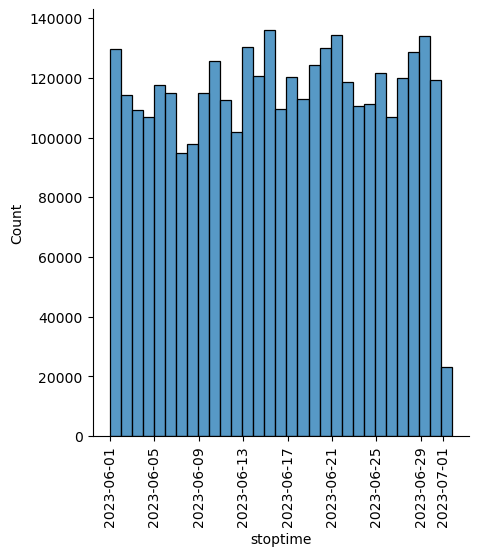

In [48]:
sns.displot(day_counts, x="stoptime", bins=31)
plt.xticks(rotation=90)
plt.show()

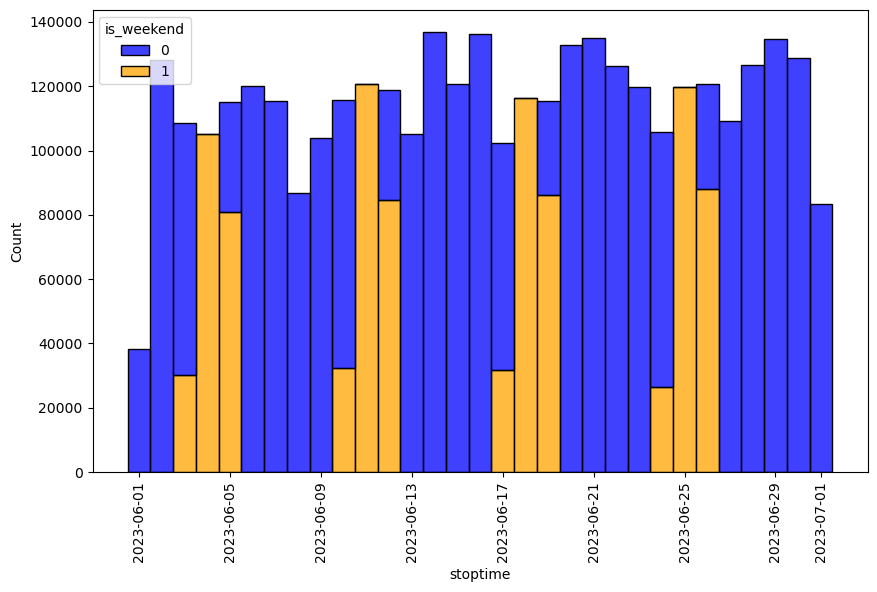

In [65]:
day_counts['is_weekend'] = day_counts['stoptime'].dt.dayofweek // 5
plt.figure(figsize=(10, 6))
plot = sns.histplot(data=day_counts, x="stoptime", bins=31, hue='is_weekend', multiple='stack', discrete=True, palette=['blue', 'orange'])
plt.xticks(rotation=90)
plt.show()

In [61]:
# we see from the chart there are few values not in june (2023-07-01) to exclude them from the analysis 
day_counts = day_counts[day_counts['stoptime'].dt.month == 6]


In [63]:
round(day_counts.describe(), 3)

,count,is_weekend
count,3551619.000,3551619.000
mean,119477.365,0.260
std,11301.196,0.438
min,94929.000,0.000
25%,111616.000,0.000
50%,119845.000,0.000
75%,129905.000,1.000
max,138526.000,1.000
